## Get DEMs of AHN4 and make preprocessed datasets

### import libraries

In [1]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm, trange
import math
# files
import requests
from io import BytesIO
from zipfile import ZipFile
import os
import shutil
from pathlib import Path
# from scipy import interpolate
import matplotlib.pyplot as plt
# GIS
from osgeo import gdal
import rasterio
from affine import Affine
import richdem as rd
from rasterio.fill import fillnodata
# torch and dataset
import torch
import torchvision
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

# functions

# from dataFunctions import *


### Get all required DEMs

1. path 
2. csv file is loaded from (ArcGis)[https://services.arcgis.com/nSZVuSZjHpEZZbRo/arcgis/rest/services/Kaartbladen_AHN4/]

In [2]:
path_root = '/Volumes/HydesT7/Grad Project/Data/'
pd_AHN4 = pd.read_csv(path_root + 'Kaartbladen_AHN4.csv')


In [3]:
pd_AHN4


,OBJECTID,Name,AHN4_DTM_05m,AHN4_DTM_5m,AHN4_DSM_05m,AHN4_DSM_5m,AHN4_LAZ,Shape__Area,Shape__Length
0,1,01CZ1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1,2,01CZ2,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
2,3,01DZ1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
3,4,01DZ2,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
4,5,01GN1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
...,...,...,...,...,...,...,...,...,...
1004,1006,69FN1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1005,1007,69FZ1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1006,1008,69GN1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1007,1009,69GN2,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500


3. Download and unzip all files

In [4]:
print("Downloading...")
path_download = path_root + 'AHN4_all/'
Path(path_download).mkdir(parents=True, exist_ok=True)

for i in tqdm(range(len(pd_AHN4["AHN4_DSM_5m"].values))):

    url_DTM5 = pd_AHN4["AHN4_DTM_5m"].values[i]
    url_DSM5 = pd_AHN4["AHN4_DSM_5m"].values[i]
    filename_DTM5 = url_DTM5.split("/")[-1]
    filename_DSM5 = url_DSM5.split("/")[-1]

    if Path(path_download+filename_DTM5[:-3]+'TIF').is_file() and Path(path_download+filename_DSM5[:-3]+'TIF').is_file():
        continue

    r_DTM5 = requests.get(url_DTM5, stream=True)
    r_DSM5 = requests.get(url_DSM5, stream=True)

    with open(path_download + filename_DTM5, "wb") as zip_dtm:
        for chunk in r_DTM5.iter_content(chunk_size=1024):
            # writing one chunk at a time to pdf file
            if chunk:
                zip_dtm.write(chunk)

    with open(path_download + filename_DSM5, "wb") as zip_dsm:
        for chunk in r_DSM5.iter_content(chunk_size=1024):
            # writing one chunk at a time to pdf file
            if chunk:
                zip_dsm.write(chunk)

print('Unzipping...')
pbar = tqdm(total=len(os.listdir(path_download)))
extension = ".zip"
for item in os.listdir(path_download):  # loop through items in dir
    if item.endswith(extension):  # check for ".zip" extension
        file_name = path_download + item  # get full path of files
        zip_ref = ZipFile(file_name)  # create zipfile object
        zip_ref.extractall(path_download)  # extract file to dir
        zip_ref.close()  # close file
        os.remove(file_name)  # delete zipped file
    pbar.update(1)
pbar.close()


Downloading...


100%|██████████| 1009/1009 [00:00<00:00, 33621.88it/s]


Unzipping...


100%|██████████| 2939/2939 [00:00<00:00, 846696.85it/s]


Find duplicates

In [5]:
len(np.unique(pd_AHN4['AHN4_DSM_5m'].values))


979

In [6]:
u, c = np.unique(pd_AHN4['Name'].values, return_counts=True)
dup = u[c > 1]
dup


array(['39AZ2', '39CN2', '39CZ2', '43DN2', '43DZ1', '43DZ2', '43EZ2',
       '43FZ1', '43FZ2', '43GN1', '43GN2', '43HN1', '43HN2', '44AZ1',
       '44AZ2', '44BZ1', '44BZ2', '44EZ1', '44EZ2', '44FZ1', '44FZ2',
       '45AN2', '45AZ1', '45AZ2', '49BN1', '49BN2', '49BZ1', '49DN1',
       '49DN2', '49DZ2'], dtype=object)

In [8]:
# from osgeo import gdal
# import rasterio
# from affine import Affine


4. take the patches in which the no-data areas are smaller than 1/8 of the overall area.

In [42]:
path_ANH4 = '/Volumes/HydesT7/Grad Project/Data/AHN4_all/'
ndv = 3.4028230607371e+38
count_all = 0
count_check = 0
item_check = []
for item in os.listdir(path_ANH4):
    if item.startswith('R5') and item.endswith('.TIF'):
        count_all += 1
        data_ = gdal.Open(path_ANH4 + item, gdal.GA_ReadOnly)
        band_ = data_.GetRasterBand(1)
        no_data = band_.GetNoDataValue()
        band_.SetNoDataValue(ndv)
        ele_ = band_.ReadAsArray()
        masked_ = np.ma.masked_where(ele_ > no_data/10, ele_)
        if np.count_nonzero(masked_.mask == True) / (masked_.mask.shape[0]*masked_.mask.shape[1]) < 1/8:
            count_check += 1
            item_check.append(item[3:-4])

print(count_check, count_all)
# with open(path_ANH4+'picked.txt', 'w') as f:
#     for it in item_check:
#         f.write(it)
#         f.write('\n')


508 979


In [43]:
len(item_check)

508

### Preprocessing
- input: patches of DSMs and DTMs
1. resampling
2. fill the no-data areas
3. compute the slop, aspect, TRI, TPI, and roughness


In [44]:
# import richdem as rd
# import dataFunctions
# from rasterio.fill import fillnodata
path_ANH4 = '/Volumes/HydesT7/Grad Project/Data/AHN4_all/'
path_in = path_ANH4
path_out = '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8_re10/'
Path(path_out).mkdir(parents=True, exist_ok=True)

xres = 10
yres = 10
resample_alg = 'average'


In [45]:
def checkNodata(file):
    rda = rd.LoadGDAL(file)
    # _ = rd.rdShow(rda, axes=True, cmap='turbo', figsize=(6, 5.5))
    rdnpa = np.asarray(rda)
    if rda.no_data>0:
        return np.any(rdnpa>rda.no_data-1)
    else:
        return np.any(rdnpa<rda.no_data+1)

In [46]:
list_hasnodata = []
pbar_ = tqdm(total=len(item_check))

for it in item_check:
# it = item_check[0]
    dsm5 = path_in+'R5_'+it+'.TIF'
    dtm5 = path_in+'M5_'+it+'.TIF'
    # resample:
    dsm10 = path_out+'R10_'+it+'.TIF'
    _ = gdal.Warp(dsm10, dsm5, xRes=xres, yRes=yres, resampleAlg=resample_alg)
    _ = None

    dtm10 = path_out+'M10_'+it+'.TIF'
    _ = gdal.Warp(dtm10, dtm5, xRes=xres, yRes=yres, resampleAlg=resample_alg)
    _ = None

    # fill nodata (for dsm30)
    with rasterio.open(dsm10) as src:
        profile = src.profile
        arr = src.read(1)
        arr_filled = fillnodata(arr, mask=src.read_masks(1), smoothing_iterations=0)

    dsm10f = path_out+'R10_'+it+'_filled.TIF'  
    with rasterio.open(dsm10f, 'w', **profile) as dest:
        dest.write_band(1, arr_filled)

    # compute attributes
    # "slope", "aspect", "TRI", "TPI", "Roughness"
    slope_ = path_out+'R10_'+it+'_slope.TIF'
    _ = gdal.DEMProcessing(slope_, dsm10f, 'slope', computeEdges=True)
    _ = None
    if checkNodata(slope_):
        list_hasnodata.append(slope_)

    aspect_ = path_out+'R10_'+it+'_aspect.TIF'
    _ = gdal.DEMProcessing(aspect_, dsm10f, 'aspect', computeEdges=True)
    _ = None
    # if checkNodata(aspect_):
    #     list_hasnodata.append(aspect_)

    tri_ = path_out+'R10_'+it+'_TRI.TIF'
    _ = gdal.DEMProcessing(tri_, dsm10f, 'TRI', computeEdges=True)
    _ = None
    # if checkNodata(tri_):
    #     list_hasnodata.append(tri_)

    tpi_ = path_out+'R10_'+it+'_TPI.TIF'
    _ = gdal.DEMProcessing(tpi_, dsm10f, 'TPI', computeEdges=True)
    _ = None
    # if checkNodata(tpi_):
    #     list_hasnodata.append(tpi_)

    roughness_ = path_out+'R10_'+it+'_Roughness.TIF'
    _ = gdal.DEMProcessing(roughness_, dsm10f, 'Roughness', computeEdges=True)
    _ = None
    if checkNodata(roughness_):
        list_hasnodata.append(roughness_)

    pbar_.update(1)
pbar_.close()

    

100%|██████████| 508/508 [01:41<00:00,  5.02it/s]


In [47]:
len(list_hasnodata)

34

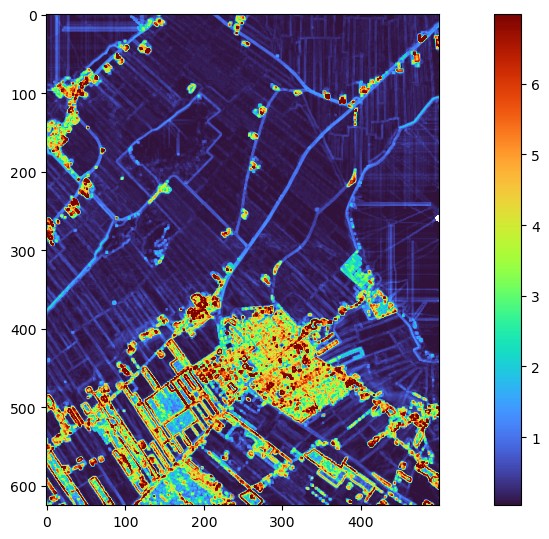

/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8_re10/R10_15EN2_Roughness.TIF [[257 499]
 [258 498]
 [258 499]
 [259 497]
 [259 498]
 [259 499]
 [260 496]
 [260 497]
 [260 498]
 [260 499]
 [261 497]
 [261 498]
 [261 499]
 [262 497]
 [262 498]
 [262 499]
 [263 498]
 [263 499]
 [264 499]]


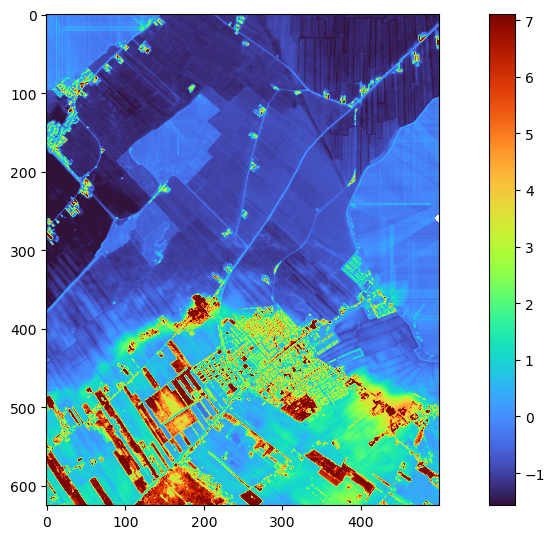

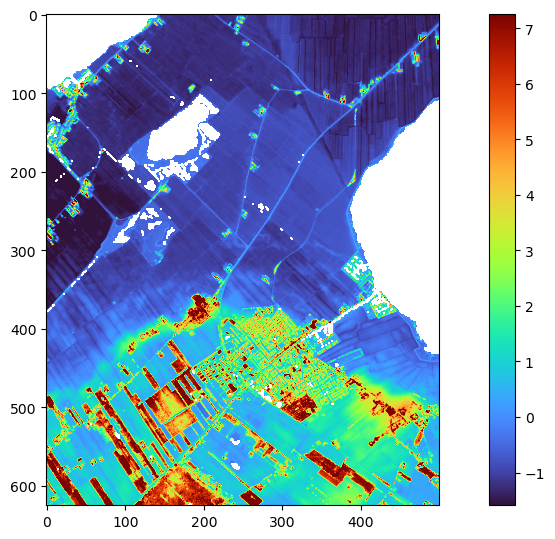

In [48]:
sa_ = random.choice(list_hasnodata)
# for sa_ in samples:
    # print(sa_)
rda = rd.LoadGDAL(sa_)
_ = rd.rdShow(rda, axes=True, cmap='turbo', figsize=(6, 5.5))
rdnpa = np.asarray(rda)

# print(sa_, np.argwhere(np.logical_and(rdnpa>rda.no_data+1, rdnpa<0)))
# print(sa_, np.argwhere(rdnpa>360))
print(sa_, np.argwhere(rdnpa<rda.no_data+1))


fill_file = sa_.replace(sa_.split('_')[-1], "")+'filled.TIF'

rda_ = rd.LoadGDAL(fill_file)
_ = rd.rdShow(rda_, axes=True, cmap='turbo', figsize=(6, 5.5))

rfile = sa_.replace(sa_.split('_')[-1], "")[:-1]+'.TIF'
rda_ = rd.LoadGDAL(rfile)
_ = rd.rdShow(rda_, axes=True, cmap='turbo', figsize=(6, 5.5))

# rdnpa = np.asarray(rda)

# with rasterio.open(path_out+sa_) as src:
#     profile = src.profile
#     arr = src.read(1)
#     arr_filled = fillnodata(arr, mask=src.read_masks(1), smoothing_iterations=0)

# saf = path_out+sa_[:-4]+'_f.TIF'
# with rasterio.open(saf, 'w', **profile) as dest:
#     dest.write_band(1, arr_filled)


# rda_ = rd.LoadGDAL(saf)
# _ = rd.rdShow(rda_, axes=True, cmap='turbo', figsize=(6, 5.5))
# rdnpa_ = np.asarray(rda_)

# print(saf, np.argwhere(rdnpa_>=rda_.no_data-1))


In [49]:
list_hasnodata[0].split('_')[-2]

'05FZ1'

In [50]:
len(item_check)

508

In [51]:
for it in list_hasnodata:
    it_ = it.split('_')[-2]
    print(it_)
    try:
        item_check.remove(it_)
    except ValueError:
        print("Item not found in list")

05FZ1
05FZ1
Item not found in list
09BN2
09BN2
Item not found in list
15EN2
15EN2
Item not found in list
16EN2
16EN2
Item not found in list
20GN2
20GN2
Item not found in list
30DZ2
30DZ2
Item not found in list
30EZ2
30EZ2
Item not found in list
32DN2
32DN2
Item not found in list
32EZ1
32EZ1
Item not found in list
37DZ1
37DZ1
Item not found in list
55AZ1
55AZ1
Item not found in list
39EZ1
39EZ1
Item not found in list
46GZ1
46GZ1
Item not found in list
50AZ2
50AZ2
Item not found in list
50BZ2
50BZ2
Item not found in list
68EN2
68EN2
Item not found in list
69EZ2
69EZ2
Item not found in list


In [52]:
len(item_check)

491

In [53]:
with open(path_ANH4+'picked_r10.txt', 'w') as f:
    for it in item_check:
        f.write(it)
        f.write('\n')

### Make datasets

In [2]:
path_ANH4 = '/Volumes/HydesT7/Grad Project/Data/AHN4_all/'

list_patch = []
with open(path_ANH4+'picked.txt') as fp:
    # list_patch.append(patch)
    list_patch = [line.rstrip('\n') for line in fp]
print(list_patch[:5], len(list_patch))

['05FZ1', '05FZ2', '05GN2', '05GZ1', '05GZ2'] 505


In [7]:
import random

# Define the substrings to exclude
picked_patchs = ['24HZ2', '31EZ2']

# Create a list of strings that don't contain the substrings to exclude
valid_patchs = [s for s in list_patch if all(e not in s for e in picked_patchs)]

# Randomly select 48 strings from the list of valid strings
test_patchs = random.sample(valid_patchs, 48)
test_patchs += picked_patchs

In [58]:
for i in test_patchs:
    if i not in item_check:
        print(i)

In [23]:
len(test_patchs)

50

In [24]:
with open(path_ANH4+'test_patchs.txt', 'w') as file:
    for s in test_patchs:
        file.write(s + '\n')

In [59]:
train_valid_patchs_r10 = [s for s in item_check if all(e not in s for e in test_patchs)]
len(train_valid_patchs_r10)

441

In [60]:
with open(path_ANH4+'train_valid_patchs_r10.txt', 'w') as file:
    for s in train_valid_patchs_r10:
        file.write(s + '\n')

In [63]:
path_pre = '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8_re10/'
ls_dsm10 = []
ls_dtm10 = []
ls_dsm10_fill = []
ls_dsm10_aspect = []
ls_dsm10_Roughness = []
ls_dsm10_slope = []
ls_dsm10_TPI = []
ls_dsm10_TRI = []
for name in train_valid_patchs_r10:
    ls_dsm10.append('R10_'+name+'.TIF')
    ls_dtm10.append('M10_'+name+'.TIF')
    ls_dsm10_fill.append('R10_'+name+'_filled.TIF')
    # ls_dsm30_aspect.append('R30_'+name+'_aspect.TIF')
    ls_dsm10_Roughness.append('R10_'+name+'_Roughness.TIF')
    ls_dsm10_slope.append('R10_'+name+'_slope.TIF')
    # ls_dsm30_TPI.append('R30_'+name+'_TPI.TIF')
    # ls_dsm30_TRI.append('R30_'+name+'_TRI.TIF')

In [64]:
from dataFunctions import *

In [65]:
cut_length = 64
cut_width = 64

dsm_slices = []
dtm_slices = []
ground_truth_slices = []
dsm_fill_slices = []
dsm_fill_arrs = []
# aspect_slices = []
# aspect_arrs = []
roughness_slices = []
roughness_arrs = []
slope_slices = []
slope_arrs = []
# tpi_slices = []
# tpi_arrs=[]
# tri_slices = []
# tri_arrs=[]

print("Slicing...")
for i in trange(len(train_valid_patchs_r10)):
    dsm10 = readTIFF(path_pre, ls_dsm10[i], masked=True)
    dtm10 = readTIFF(path_pre, ls_dtm10[i], masked=True)
    dsm10_fill = readTIFF(path_pre, ls_dsm10_fill[i])
    # dsm30_aspect = readTIFF(path_pre, ls_dsm30_aspect[i])
    dsm10_Roughness = readTIFF(path_pre, ls_dsm10_Roughness[i])
    dsm10_slope = readTIFF(path_pre, ls_dsm10_slope[i])
    # dsm30_Roughness = readTIFF(path_pre, ls_dsm30_Roughness[i])
    # dsm30_TPI = readTIFF(path_pre, ls_dsm30_TPI[i])
    # dsm30_TRI = readTIFF(path_pre, ls_dsm30_TRI[i])

    dsm_fill_arrs.append(dsm10_fill)
    # aspect_arrs.append(dsm30_aspect)
    roughness_arrs.append(dsm10_Roughness)
    slope_arrs.append(dsm10_slope)
    # roughness_arrs.append(dsm30_Roughness)
    # tpi_arrs.append(dsm30_TPI)
    # tri_arrs.append(dsm30_TRI)

    dsm_slices += sliceRisPic(dsm10, cut_width, cut_length)
    dtm_slices += sliceRisPic(dtm10, cut_width, cut_length)
    dsm_fill_slices += sliceRisPic(dsm10_fill, cut_width, cut_length)
    # aspect_slices += sliceRisPic(dsm30_aspect, cut_width, cut_length)
    roughness_slices += sliceRisPic(dsm10_Roughness, cut_width, cut_length)
    slope_slices += sliceRisPic(dsm10_slope, cut_width, cut_length)
    # roughness_slices += sliceRisPic(dsm30_Roughness, cut_width, cut_length)
    # tpi_slices += sliceRisPic(dsm30_TPI, cut_width, cut_length)
    # tri_slices += sliceRisPic(dsm30_TRI, cut_width, cut_length)

    # dsm_slices.append(normalize01(sliceRisPic(dsm30, cut_width, cut_length)[0]))
    # dtm_slices.append(normalize01(sliceRisPic(dtm30, cut_width, cut_length)[0]))
    # dsm_fill_slices.append(normalize01(sliceRisPic(dsm30_fill, cut_width, cut_length)[0]))
    # aspect_slices.append(normalize01(sliceRisPic(dsm30_aspect, cut_width, cut_length)[0]))
    # roughness_slices.append(normalize01(sliceRisPic(dsm30_Roughness, cut_width, cut_length)[0]))
    # slope_slices.append(normalize01(sliceRisPic(dsm30_slope, cut_width, cut_length)[0]))
    # tpi_slices.append(normalize01(sliceRisPic(dsm30_TPI, cut_width, cut_length)[0]))
    # tri_slices.append(normalize01(sliceRisPic(dsm30_TRI, cut_width, cut_length)[0]))

# print("0-1 Normalizing...")
# for i in trange(len(dsm_slices)):
#     # dsm_slices[i] = normalize01(dsm_slices[i])
#     # dtm_slices[i] = normalize01(dtm_slices[i])
#     dsm_fill_slices[i] = normalize01(dsm_fill_slices[i])
#     # aspect_slices[i] = normalize01(aspect_slices[i])
#     roughness_slices[i] = normalize01(roughness_slices[i])
#     slope_slices[i] = normalize01(slope_slices[i])
#     # tpi_slices[i] = normalize01(tpi_slices[i])
#     # tri_slices[i] = normalize01(tri_slices[i])

#     dsm_fill_arrs.append(dsm_fill_slices[i])
#     # aspect_arrs.append(aspect_slices[i])
#     slope_arrs.append(slope_slices[i])
#     roughness_arrs.append(roughness_slices[i])
#     # tpi_arrs.append(tpi_slices[i])
#     # tri_arrs.append(tri_slices[i])


mean_dsm, std_dsm = getNormalParams(dsm_fill_arrs)
# mean_aspect, std_aspect = getNormalParams(aspect_arrs)
# mean_slope, std_slope = getNormalParams(slope_arrs)
mean_roughness, std_roughness = getNormalParams(roughness_arrs)
mean_slope, std_slope = getNormalParams(slope_arrs)
# mean_tpi, std_tpi = getNormalParams(tpi_arrs)
# mean_tri, std_tri = getNormalParams(tri_arrs)


dsm_slices += augmentateData(dsm_slices)
dtm_slices += augmentateData(dtm_slices)
dsm_fill_slices += augmentateData(dsm_fill_slices)
# aspect_slices += augmentateData(aspect_slices)
roughness_slices += augmentateData(roughness_slices)
slope_slices += augmentateData(slope_slices)
# tpi_slices += augmentateData(tpi_slices)
# tri_slices += augmentateData(tri_slices)

print("Generating ground truth...")

for nn in trange(len(dsm_slices)):
    ground_truth_slices.append(
        generateGroundTruth(dsm_slices[nn], dtm_slices[nn], 0.5))


Slicing...


100%|██████████| 441/441 [00:16<00:00, 27.43it/s]


Generating ground truth...


100%|██████████| 282240/282240 [03:35<00:00, 1309.12it/s]


In [66]:
para_means = np.asarray([mean_dsm, mean_roughness, mean_slope])
para_stds = np.asarray([std_dsm, std_roughness, std_slope])

In [67]:
display(para_means, para_stds)

array([9.9829047 , 2.30199648, 3.69028585])

array([19.85274451,  3.13658287,  5.51456649])

In [68]:
slope_arrs[0].shape

(625, 500)

In [69]:
# Pics_aspect = stackPics(dsm_fill_slices, slope_slices, aspect_slices)
# Pics_roughness = stackPics(dsm_fill_slices, slope_slices, roughness_slices)
# Pics_ = stackPics(dsm_fill_slices, roughness_slices, slope_slices)
# Pics_n = stackPics(dsm_fill_slices, roughness_slices, slope_slices, normalization=True)
# Pics_tpi = stackPics(dsm_fill_slices, slope_slices, tpi_slices)
# Pics_tri = stackPics(dsm_fill_slices, slope_slices, tri_slices)
Pics = stackPics(dsm_fill_slices, roughness_slices, slope_slices)

In [70]:
Masks = np.stack(ground_truth_slices)
Masks = Masks.astype(np.float32)
Masks.shape

(282240, 2, 64, 64)

In [71]:
Pics.shape

(282240, 64, 64, 3)

In [72]:
# out_file_path = '/Volumes/HydesT7/Grad Project/Data/U_Net/64_64_1_8/'
out_file_path = '/Volumes/HydesT7/Grad Project/Data/U_Net/64_64_1_8_re10/'
Path(out_file_path).mkdir(parents=True, exist_ok=True)
# np.save(out_file_path+'Pics_aspect', Pics_aspect)
# np.save(out_file_path+'Pics_roughness', Pics_roughness)
# np.save(out_file_path+'Pics_tpi', Pics_tpi)
# np.save(out_file_path+'Pics_tri', Pics_tri)
np.save(out_file_path+'Pics', Pics)
np.save(out_file_path+'Masks_0.5', Masks)

In [73]:
np.save(out_file_path+'para_means', para_means)
np.save(out_file_path+'para_stds', para_stds)

In [14]:
mean = np.array([0.,0.,0.])
stdTemp = np.array([0.,0.,0.])
std = np.array([0.,0.,0.])
 
numSamples = len(Pics_)
 
for i in range(numSamples):
#     im = cv2.imread(str(files[i]))
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#     im = im.astype(float) / 255.
    im = Pics_[i]
     
    for j in range(3):
        mean[j] += np.mean(im[:,:,j])
       
mean = (mean/numSamples)
# Pics_[0][:,:,0].shape
display(mean)

for i in range(numSamples):
    # im = cv2.imread(str(files[i]))
    # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    # im = im.astype(float) / 255.
    im = Pics_[i]
    for j in range(3):
        stdTemp[j] += ((im[:,:,j] - mean[j])**2).sum()/(im.shape[0]*im.shape[1])
 
std = np.sqrt(stdTemp/numSamples)
display(std)

array([9.70152193, 2.44566803, 1.33756769])

array([19.61182879,  2.87440117,  1.82230612])

In [43]:
out_file_path = '/Users/hyde-mbp/Projects/Grad/data/64_64_1_8_re_n/'
Path(out_file_path).mkdir(parents=True, exist_ok=True)
# np.save(out_file_path+'Pics_aspect', Pics_aspect)
np.save(out_file_path+'Pics_n', Pics_n)
# np.save(out_file_path+'Pics_tpi', Pics_tpi)
# np.save(out_file_path+'Pics_tri', Pics_tri)
np.save(out_file_path+'Masks_0.1', Masks)

In [44]:
mean = np.array([0.,0.,0.])
stdTemp = np.array([0.,0.,0.])
std = np.array([0.,0.,0.])
 
numSamples = len(Pics_n)
 
for i in range(numSamples):
    im = Pics_n[i]
     
    for j in range(3):
        mean[j] += np.mean(im[:,:,j])
       
mean = (mean/numSamples)
display(mean)
for i in range(numSamples):
    im = Pics_n[i]
    for j in range(3):
        stdTemp[j] += ((im[:,:,j] - mean[j])**2).sum()/(im.shape[0]*im.shape[1])
 
std = np.sqrt(stdTemp/numSamples)
display(std)

array([0.19322582, 0.15582052, 0.11481054])

array([0.16601407, 0.17010983, 0.14245814])

In [45]:
np.save(out_file_path+'para_means', mean)
np.save(out_file_path+'para_stds', std)

In [33]:
path_folder = '/Volumes/HydesT7/Grad Project/Data/U_Net/64_64_1_8/'
input_images = np.load(path_folder+'Pics_roughness.npy')
target_masks = np.load(path_folder+'Masks.npy')

In [34]:
mean = np.array([0.,0.,0.])
stdTemp = np.array([0.,0.,0.])
std = np.array([0.,0.,0.])
 
numSamples = len(input_images)
 
for i in range(numSamples):
    im = input_images[i]
     
    for j in range(3):
        mean[j] += np.mean(im[:,:,j])
       
mean = (mean/numSamples)
display(mean)
for i in range(numSamples):
    im = input_images[i]
    for j in range(3):
        stdTemp[j] += ((im[:,:,j] - mean[j])**2).sum()/(im.shape[0]*im.shape[1])
 
std = np.sqrt(stdTemp/numSamples)
display(std)

array([9.70152193, 2.44566803, 1.33756769])

array([19.61182879,  2.87440117,  1.82230612])

In [35]:
means = np.load(path_folder+'para_means.npy')
stds = np.load(path_folder+'para_stds.npy')

In [36]:
display(means, stds)

array([ 9.58922932e+00,  1.82313887e+02,  1.33782967e+00,  2.44634462e+00,
       -7.62216900e-06,  2.95785730e+00])

array([ 19.38095313, 105.40469535,   1.82939009,   2.89187662,
         1.06024432,   3.64120577])

In [1]:
import dataFunctions
sa = random.choice(ls_dsm30_fill)
# dem = rd.LoadGDAL(path_pre+sa)
dem = dataFunctions.readTIFF(path_pre, sa)
dem
# _ = rd.rdShow(dem, axes=True, cmap='turbo', figsize=(6, 5.5))


NameError: name 'random' is not defined

In [32]:
dem_n = np.asarray(dem)


(array([  0,   0,   0, ..., 207, 207, 207]),
 array([  0,   1,   2, ..., 164, 165, 166]))

### old codes:

In [35]:
path_in = path_ANH4
path_out = '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed/'
# file_in = path_in+item_check[0]
# file_out = path_out+item_check[0][:-4]+'_res30.tif'

# xres=30
# yres=30
# resample_alg = 'average'

# ds = gdal.Warp(file_out, file_in, xRes=xres, yRes=yres, resampleAlg=resample_alg)
# ds = None


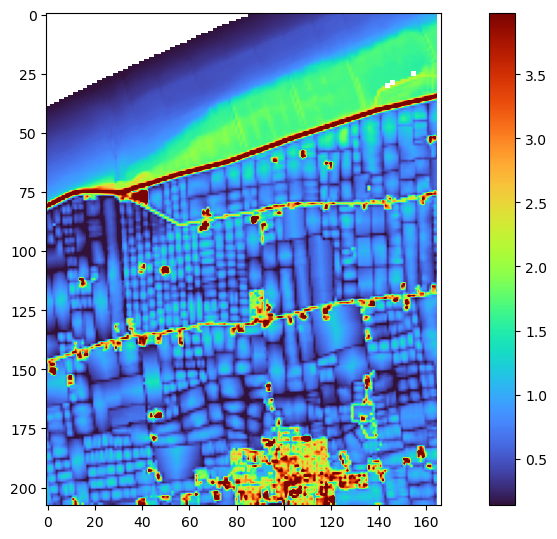

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import richdem as rd

import dataFunctions

dem = rd.LoadGDAL(file_out)
ndv = 3.4028230607371e+38

# dem = np.asarray(dem)
# plt.subplot(1, 2, 1)
# ras = dataFunctions.readTIFF(path_out, item_check[0][:-4]+'_res30.tif')
_ = rd.rdShow(dem, axes=True, cmap='turbo', figsize=(6, 5.5))
# plt.imshow(dem, interpolation='none')
# plt.imshow(dem, interpolation='none', cmap='terrain')


# plt.imshow(ras.data)
# plt.colorbar()
# plt.show()


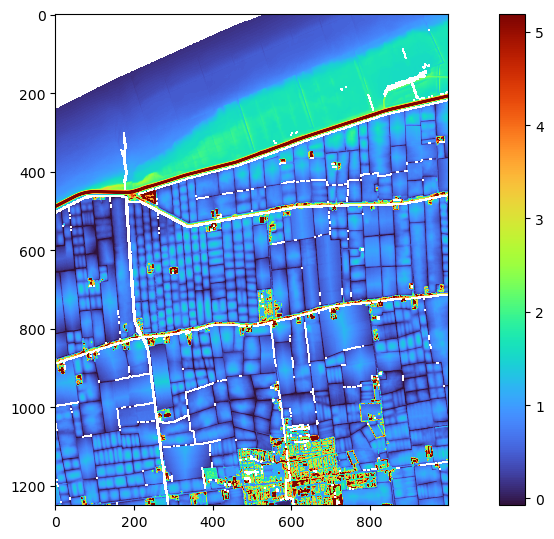

In [37]:
dem = rd.LoadGDAL(file_in)
_ = rd.rdShow(dem, axes=True, cmap='turbo', figsize=(6, 5.5))


In [123]:
ndv = dem[0][0]


In [39]:
from rasterio.fill import fillnodata

# ras = dataFunctions.readTIFF(path_out, item_check[0][:-4]+'_res30.tif')
# ras.mask = ras.mask.astype(np.int16)
# ras_filled = fill.fillnodata(ras, ras.mask)
# ras.mask = ras.mask.astype(np.int16)

with rasterio.open(file_out) as src:
    profile = src.profile
    arr = src.read(1)
    arr_filled = fillnodata(arr, mask=src.read_masks(1),
                            smoothing_iterations=0)

newtif_file = path_out+item_check[0][:-4]+'_30_filled.tif'
with rasterio.open(newtif_file, 'w', **profile) as dest:
    dest.write_band(1, arr_filled)


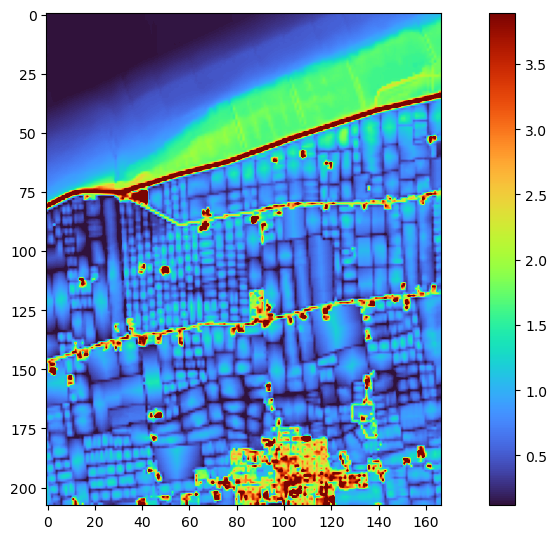

In [40]:
dem_ = rd.LoadGDAL(newtif_file)
_ = rd.rdShow(dem_, axes=True, cmap='turbo', figsize=(6, 5.5))


In [128]:
file_out = path_out+item_check[2][:-4]+'_30_slope.tif'

ds_ = gdal.DEMProcessing(file_out, newtif_file, 'slope', computeEdges=True)
ds_ = None


In [ ]:
gdal.DEMProcessing()


In [112]:
ras_filled = rd.rdarray(arr_filled, no_data=ndv)


In [1]:
from otherFunctions import rdShow


In [5]:
slope = rd.LoadGDAL(file_out)
slope = np.asarray(slope)
rdShow(slope, axes=True, cmap='magma', figsize=(6, 5.5))


NameError: name 'file_out' is not defined

In [114]:
ras_filled.shape


(208, 167)

In [116]:
dem.shape


(208, 167)

In [53]:
dem = np.asarray(dem)


In [54]:
gdal.FillNodata()


array([[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 1.0422570e+00,
        1.0553972e+00, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 1.0702146e+00,
        1.1127838e+00, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 1.1700921e+00,
        1.2371302e+00, 3.4028235e+38],
       ...,
       [1.1181267e+00, 1.0969100e+00, 6.5039194e-01, ..., 3.6103174e-01,
        9.1390455e-01, 3.4028235e+38],
       [1.0287095e+00, 9.5588768e-01, 7.2244066e-01, ..., 4.4526455e-01,
        1.0196025e+00, 3.4028235e+38],
       [1.1463768e+00, 7.2427207e-01, 7.0493817e-01, ..., 5.8897799e-01,
        8.9907271e-01, 3.4028235e+38]], dtype=float32)

In [ ]:
gdal.DEMProcessing()


In [ ]:
gdal.DEMProcessingOptions()


In [31]:
gdal.WarpOptions()


(<osgeo.gdal.GDALWarpAppOptions; proxy of <Swig Object of type 'GDALWarpAppOptions *' at 0x7fadc0263570> >,
 None,
 None)

In [15]:
data_r = gdal.Open(path_ANH4 + 'R5_30GN1.TIF', gdal.GA_ReadOnly)
band_r = data_r.GetRasterBand(1)
band_r.SetNoDataValue(ndv)
ele_r = band_r.ReadAsArray()
ele_r[0][0]


3.4028235e+38

In [24]:
masked_r = np.ma.masked_where(ele_r > 9999.9, ele_r)
# count = 0
# for i in range(masked_r.mask.shape[0]):
#     for j in range(masked_r.mask.shape[1]):
#         print(masked_r.mask[i][j])
np.count_nonzero(masked_r.mask == True) / \
    (masked_r.mask.shape[0]*masked_r.mask.shape[1])


0.1355008